# Tutorial de Big Data (UdeSA) 2025

## Tutorial 9 

### LASSO 

**Objetivo:**  
Que se familiaricen con las técnicas de Regularización de  Lasso 

### Temario:
- Contonuar con el ejemplo con la base de hitters 
- Regularización con Lasso

### Modelos lineales regularizados con Ridge y Lasso

Exploraremos brevemente el conjunto de datos "Hitters" y usaremos la librería de sklearn para ajustar modelos lineales regularizados por Ridge y Lasso (son las siglas en inglés para: operador de selección y contracción mínima absoluta) con el fin de predecir el salario de los jugadores de béisbol.

Esta es una adaptación del Lab de Linear Models and Regularization Methods del libro "Introduction to Statistical Learning with Applications in Python" de Gareth James, Daniela Witten, Trevor Hastie, Robert Tibshirani y Jonathan Taylor. [Acá](https://islp.readthedocs.io/en/latest/labs/Ch06-varselect-lab.html) pueden encontrar más información

##### Baseball data, 'Hitters'
Datos de la Major League de Baseball Data en las temporadas 1986 y 1987.
La base de Hitters tiene las siguientes variables:
- AtBat: Number of times at bat in 1986
- Hits: Number of hits in 1986
- HmRun: Number of home runs in 1986
- Runs: Number of runs in 1986
- RBI: Number of runs batted in in 1986
- Walks: Number of walks in 1986
- Years: Number of years in the major leagues
- CAtBat: Number of times at bat during his career
- CHits: Number of hits during his career
- CHmRun: Number of home runs during his career
- CRuns: Number of runs during his career
- CRBI: Number of runs batted in during his career
- CWalks: Number of walks during his career
- League: A factor with levels A and N indicating player’s league at the end of 1986
- Division: A factor with levels E and W indicating player’s division at the end of 1986
- PutOuts: Number of put outs in 1986
- Assists: Number of assists in 1986
- Errors: Number of errors in 1986
- Salary: 1987 annual salary on opening day in thousands of dollars
- NewLeague: A factor with levels A and N indicating player’s league at the beginning of 1987


Nuestro objetivo será **predecir el salario** (regresión)

### 1. Leer el conjunto de datos y explorar la estructura de datos 

In [ ]:
# Importamos los paquetes necesarios
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ISLP import load_data

from sklearn.preprocessing import scale
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [ ]:
Hitters = load_data('Hitters')
print(Hitters.info())
print('Dimensión de la base:', Hitters.shape, '\n')
#Vemos los missing values en Y
print('\nMissings en variable dependiente:', np.isnan(Hitters['Salary']).sum())

In [ ]:
# Eliminamos missings en la variable dependiente
Hitters = Hitters.dropna() 
print('\n Nueva dimensión de la base:', Hitters.shape)

In [ ]:
Hitters

In [ ]:
Hitters.describe().T.round(2)

### 2. Preparar las X e Y que usaremos en el modelo

Aquí seleccionamos las variables que utilizaremos en nuestro modelo y transformamos a dummies las que son strings

In [ ]:
y = Hitters.Salary

In [ ]:
print(Hitters.League.value_counts())
print(Hitters.Division.value_counts())
print(Hitters.NewLeague.value_counts())

# Creamos variables dummies para las variables string
dummies = pd.get_dummies(Hitters[['League', 'Division', 'NewLeague']], drop_first=True)
dummies

In [ ]:
# Definimos las variables que incluiremos en el set de X

# Eliminamos salarios (porque es nuestra y) y las columnas de strings
X_ = Hitters.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X.info()

### 3. Dividimos la base en observaciones para entrenamiento y testeo

Ahora dividimos la muestra en un conjunto de entrenamiento y un conjunto de prueba para luego estimar el error en el conjunto de prueba. 

In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# Revisamos cuantas observaciones quedaron para Test y cuantas para Entrenamiento.
print(f'El conjunto de entrenamiento tiene {len(X_train)} observaciones.')
print(f'El conjunto de test tiene {len(X_test)} observaciones.')

### 4. Regularización


Les dejo la documentación para que puedan comparar:
- Para clasificación ($Y$ categorica) recuerden que usamos la función [LogisticRegression()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Con dicha función, se puede hacer un ejercicio de clasificacion con amabas penalidades. Lasso usa una penalidad llamada l1 (que fuerza algunos coeficientes para que sean iguales a 0, seleccionando variables) y Ridge usa una penalidad llamada l2 (que hace que algunos coeficientes sean más cercanos a 0 pero sin llegar a 0)
- Para regresión ($Y$ numerica)  usaremos la funciones [Ridge()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) y [Lasso()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso) 


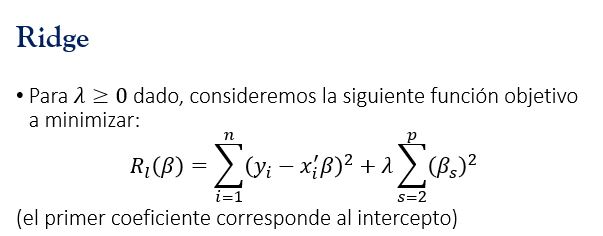

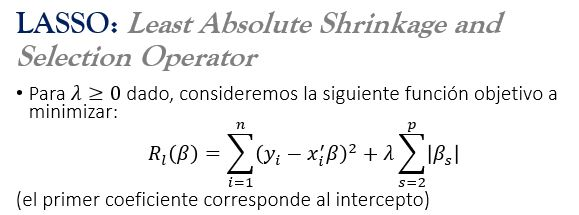

Usamos la funciones [Ridge()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) y [Lasso()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) para realizar distintas regresiones lineales regularizadas. Estas funciones tienen un argumento  **alfa** $\alpha$ (es el **λ** pero con otro nombre) que **controla el peso de la regularización**.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Estadisticas antes de estandarizar
X_train.describe().T.round(2)

In [ ]:
# Iniciamos el Standard Scaler
sc = StandardScaler()

# Estandarizamos las observaciones de entrenamiento
X_train_transformed = pd.DataFrame(sc.fit_transform(X_train), index=X_train.index, columns=X_train.columns)

# Estandarizamos las observaciones de test
X_test_transformed = pd.DataFrame(sc.transform(X_test), index=X_test.index, columns=X_test.columns)

# Estadisticas de los predictores luego de estandarizar
X_train_transformed.describe().T.round(2)

### 5. Regresión con LASSO

Iniciemos, nuevamente con un modelo sin shrinkage $\alpha=0$:

In [ ]:
alpha = 0
print("Alpha:", alpha)

lasso_a0 = Lasso(alpha = alpha)
lasso_a0.fit(X_train_transformed, y_train)             
pred_a0_l = lasso_a0.predict(X_test_transformed)
mse_a0_l = mean_squared_error(y_test, pred_a0_l)

print("Mean Squared Error de testeo (MSE test):", round(mse_a0_l,2))   
print("Coeficientes del modelo para LASSO:")
print(pd.Series(lasso_a0.coef_, index = X_train_transformed.columns).round(2)) 

El $MSE_{test}$  con $\alpha=0$ es: 124,167.15

Probar como en las Clase 14 (Ridge) estimar regresion por MCO y vero los coeficientes y $MSE_{test}$

Seguimos con un $\alpha=1$

In [ ]:
alpha = 1
print("Alpha:", alpha)

lasso_a1 = Lasso(alpha = alpha)
lasso_a1.fit(X_train_transformed, y_train)             
pred_a1_l = lasso_a1.predict(X_test_transformed)
mse_a1_l = mean_squared_error(y_test, pred_a1_l)

print("Mean Squared Error de testeo (MSE test):", round(mse_a1_l,2))   
print("Coeficientes del modelo para LASSO:")
print(pd.Series(lasso_a1.coef_, index = X_train_transformed.columns).round(2)) 

El  $MSE_{test}$  con $\alpha=1$ es 118,177.9 y notamos que el coeficiente de `League_N` es $0$ (`test_size=0.3`) 

In [ ]:
from sklearn.linear_model import LinearRegression
modelo_lineal = LinearRegression().fit(X_train_transformed, y_train)
pred_lin = modelo_lineal.predict(X_test_transformed)
mse_lin = mean_squared_error(y_test, pred_lin)

print("Mean Squared Error de testeo (MSE test): ", round(mse_lin,2)) 
print("Coeficientes de la regresión lineal:")
print(pd.Series(modelo_lineal.coef_, index = X_train_transformed.columns).round(2)) 

##### Para la casa: 
Probar con $\alpha=10^{10}$

#### Plot Lasso: coeficientes según parámetros de ajuste alfa

Hagamos lo mismo que hicimos para Ridge y grafiquemos la evolución de los parámetros en función de alpha.

In [ ]:
# Matriz de valores de alfa
alphas = 10**np.linspace(6,-2,50)*0.5
np.set_printoptions(suppress = True)
alphas

In [ ]:
coefs = []
for a in alphas:
    lasso = Lasso(alpha=a, fit_intercept=False, max_iter=100000)
    lasso.fit(X_train_transformed, y_train)
    coefs.append(lasso.coef_)

In [ ]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("Coeficientes")
plt.title("Coeficientes de LASSO como function" "\ndel parametro de regularización")
plt.axis("tight")
plt.show()

#### Lasso con validación cruzada 
Realizamos una validación cruzada de 5 veces para elegir el mejor alfa, reajustar el modelo, calcular el error de prueba asociado e imprimir los mejores coeficientes de modelos.

In [ ]:
# Usamos cross-validation para dividir la muestra en training y validation sets
lassocv = LassoCV(alphas=alphas, cv=5, max_iter=100000, random_state=100)
lassocv.fit(X_train_transformed, y_train)
print("Alpha óptimo:", lassocv.alpha_.round(2))


# Ahora estimamos nuevamente el modelo con el alpha (lambda) óptimo
lasso = Lasso(alpha=lassocv.alpha_)
lasso.fit(X_train_transformed, y_train)
lasso_pred = lasso.predict(X_test_transformed)

print("Mean Squared Error de testeo (MSE test):", round(mean_squared_error(y_test, lasso_pred),2))
print("Coeficientes del mejor modelo:")
pd.Series(lasso.coef_, index=X_train_transformed.columns)

# Para guardarlo en un dataframe...
coeficientes_finales = pd.DataFrame([np.array(X_train_transformed.columns.tolist()),np.round(lasso.coef_,2)]).T
coeficientes_finales.columns = ['feature','coeficiente']
print(f"El modelo final cuenta con: {coeficientes_finales[coeficientes_finales['coeficiente']!=0].shape[0]}",'features' )
coeficientes_finales

Ahora algunos coeficientes son exactamente cero. Por lo tanto, **Lasso** tiene una ventaja sustancial sobre la regresión de Ridge en que **realiza una selección de las variables del modelo**. 
Para completar la imagen, necesitamos los resultados de validación cruzada correspondientes de la regresión de la Ridge.

### Performance de los modelos regularizados con Ridge y con Lasso con Cross-validation:

#### Rehacemos Ridge con validación cruzada 

Nuevamente, realizamos una validación cruzada con k=5 para elegir el mejor alfa, reajustar el modo, calcular el error de prueba asociado e imprimir los mejores coeficientes de modelos. Esta vez regularizando con [RidgeCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html)

In [ ]:
ridgecv = RidgeCV(alphas=alphas, cv=5).fit(X_train_transformed, y_train)
print("El mejor alpha:", ridgecv.alpha_.round(2))

# Ahora con el alpha óptimo, volvemos a estimar nuestro modelo
ridge = Ridge(alpha=ridgecv.alpha_)
ridge = ridge.fit(X_train_transformed, y_train)
ridge_pred = ridge.predict(X_test_transformed)
mse_ridge = mean_squared_error(y_test, ridge_pred)

print("Mean Squared Error de testeo (MSE test):", round(mse_ridge,2))   

print("Coeficientes del mejor modelo:")
print(pd.Series(ridgecv.coef_, index = X_train_transformed.columns).round(2)) 

Comparemos el $MSE_{test}$  con $\alpha$ optimo elegido por cross-validation

In [ ]:
print("Mean Squared Error de testeo (MSE test) con MCO: ", round(mse_lin,2))
print("Mean Squared Error de testeo (MSE test) con Ridge: ", round(mean_squared_error(y_test, ridge_pred),2))
print("Mean Squared Error de testeo (MSE test) con Lasso: ", round(mean_squared_error(y_test, lasso_pred),2))

#### Resumen
Con alpha elegido por validación cruzada el error cuadrático medio del Lasso es un poco mejor que el de regresión de Ridge. 

A su vez, Lasso tiene una gran ventaja sobre la regresión de Ridge, ya que produce modelos más simples e interpretables que involucran solo a un subconjunto de predictores.
